In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from src.data_loader.DataLoader import DataLoader
from src.eval import (eval_adam, eval_iwls, eval_lda, eval_qda,
                      eval_random_forest, eval_sgd, eval_tree)

sns.set_theme(rc={'figure.figsize':(8,6)})

In [12]:
random_states = [420, 69, 42, 24, 96, 1312, 777]

In [3]:
loader = DataLoader(product=False)

results = pd.DataFrame()

for dataset in tqdm(loader.get_supported_datasets()):
    for random_state in tqdm(random_states):
        result = {}
        # IWLS
        result['dataset'] = dataset
        result['random_state'] = random_state
        result['method'] = 'IWLS'
        result['loglik'] = eval_iwls(loader, dataset, random_state, max_iterations=500, patience=5)[2]
        results = pd.concat([results, pd.DataFrame.from_records([result])], ignore_index=True)
        
        # SGD
        result['method'] = 'SGD'
        # result['loglik'] = eval_sgd(loader, dataset, random_state, max_iterations=500, patience=5, batch_size=100)[1]
        result['loglik'] = eval_sgd(loader, dataset, random_state, max_iterations=500, patience=5, learning_rate=0.01)[1]
        # result['loglik'] = eval_sgd(loader, dataset, random_state, max_iterations=500, patience=5)[1]
        results = pd.concat([results, pd.DataFrame.from_records([result])], ignore_index=True)

        # ADAM
        result['method'] = 'ADAM'
        # result['loglik'] = eval_adam(loader, dataset, random_state, max_iterations=500, patience=5, batch_size=100)[1]
        result['loglik'] = eval_adam(loader, dataset, random_state, max_iterations=500, patience=5, learning_rate=0.001)[1]
        # result['loglik'] = eval_adam(loader, dataset, random_state, max_iterations=500, patience=5)[1]
        results = pd.concat([results, pd.DataFrame.from_records([result])], ignore_index=True)

results

,dataset,random_state,method,loglik
0,banknote,420,IWLS,"[0.3848153161178474, 0.3393515506147822, 0.332..."
1,banknote,420,SGD,"[0.38568718735754765, 0.35111993444142087, 0.3..."
2,banknote,420,ADAM,"[0.51927856847786, 0.43746370219321723, 0.3945..."
3,banknote,69,IWLS,"[0.37209392720974194, 0.3231228244075203, 0.31..."
4,banknote,69,SGD,"[0.37528855870674876, 0.33710058663650067, 0.3..."
...,...,...,...,...
184,pc1,1312,SGD,"[0.6811801860331769, 0.68159901181441, 0.68191..."
185,pc1,1312,ADAM,"[0.6840316911792022, 0.6824720780073646, 0.681..."
186,pc1,777,IWLS,"[0.6804691877925392, 0.679756664669656, 0.6797..."
187,pc1,777,SGD,"[0.6806538880169813, 0.6810913419593418, 0.682..."


In [ ]:
results.to_pickle('convergence_performance.pkl')

In [4]:
colors = {"IWLS": "blue", "SGD": "green", "ADAM": "red"}

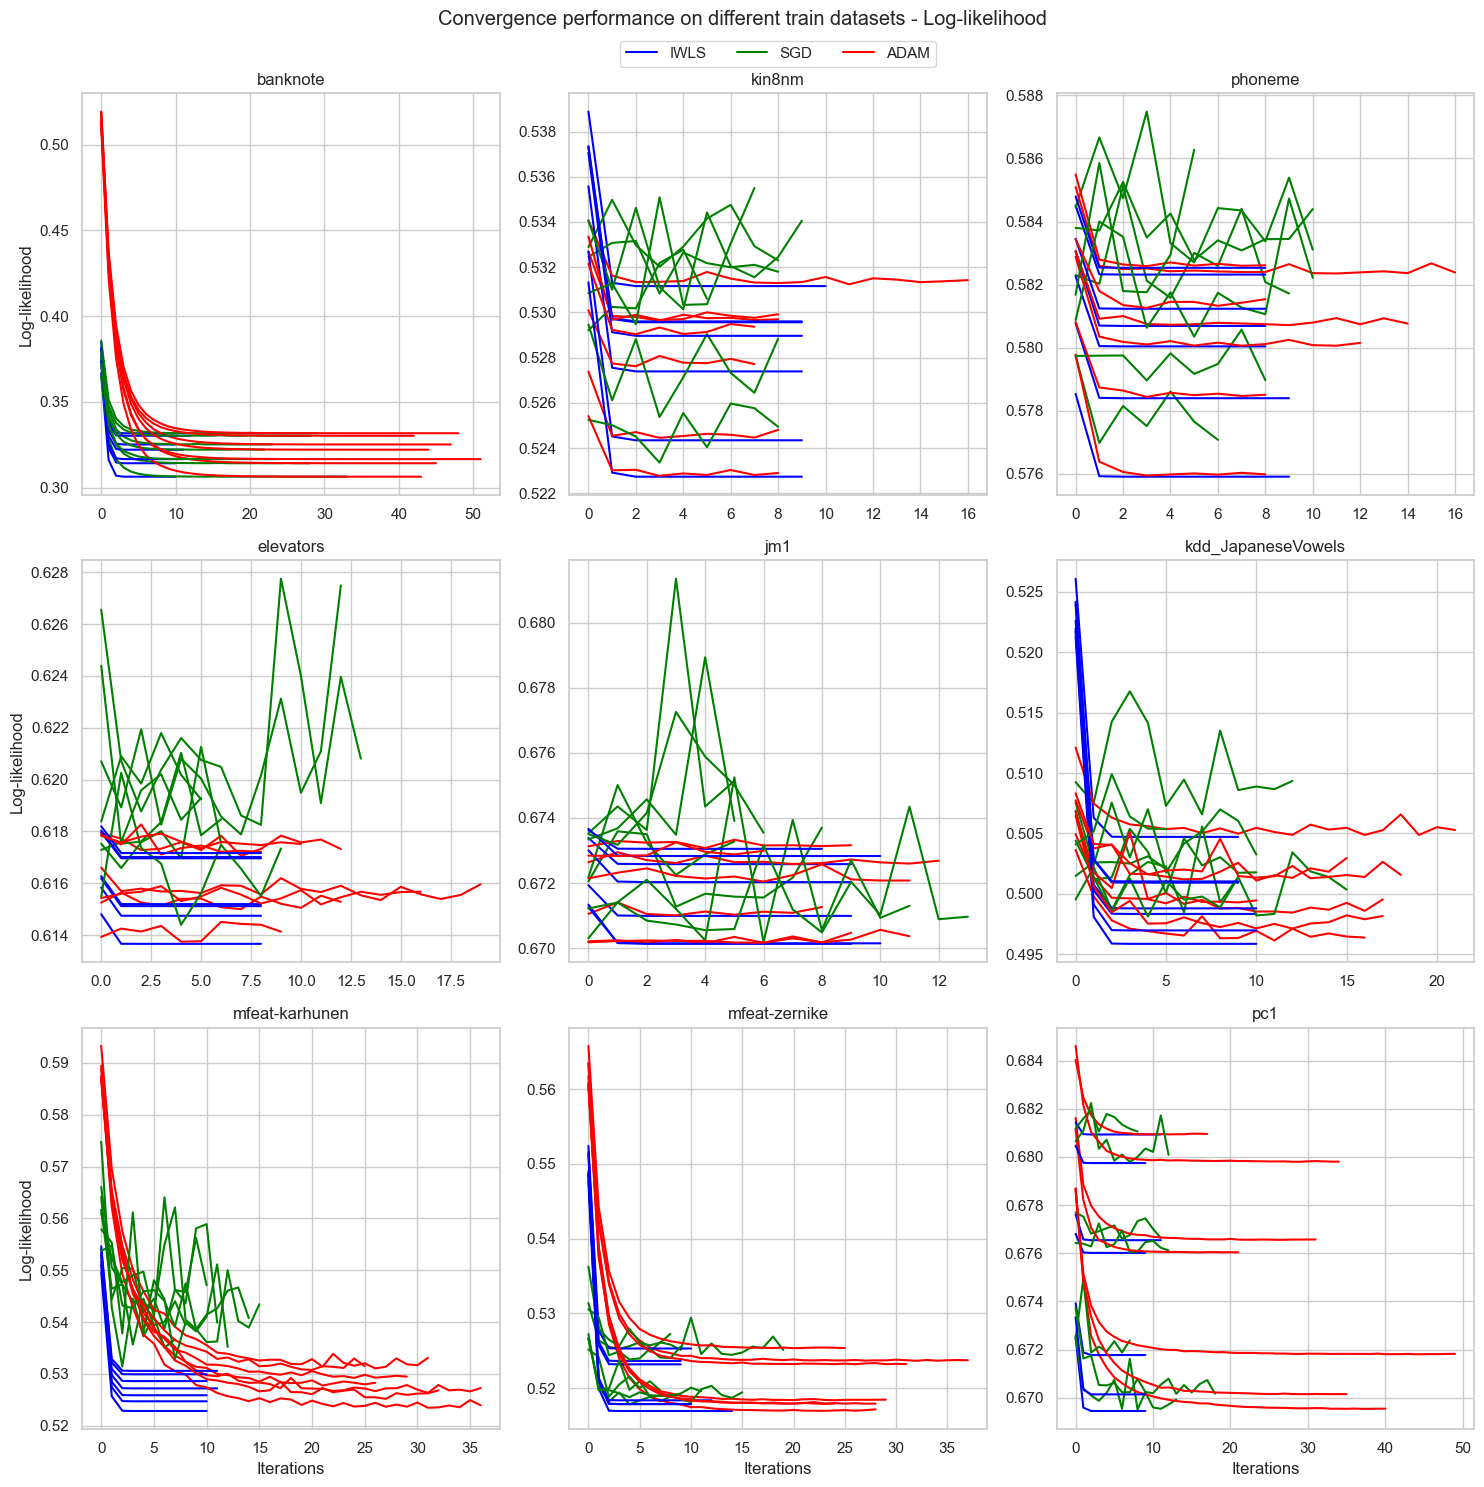

In [8]:
sns.set_theme(style="whitegrid")
colors = {'IWLS': 'blue', 'SGD': 'green', 'ADAM': 'yellow'}
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Convergence performance on different train datasets - Log-likelihood', y=.99)
for i, dataset in enumerate(loader.get_supported_datasets()):
    res = results[results['dataset'] == dataset]
    for j, row in res.iterrows():
        axes[i//3, i%3].plot(row['loglik'], color=colors[row['method']])
    if i//3 == 0 and i%3 == 1:
        axes[i//3, i%3].legend(['IWLS', 'SGD', 'ADAM'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
    if i//3 == 2:
        axes[i//3, i%3].set_xlabel('Iterations')
    if i%3 == 0:
        axes[i//3, i%3].set_ylabel('Log-likelihood')
    axes[i//3, i%3].set_title(dataset)

plt.tight_layout()
plt.show()

In [6]:
# read convergence_performance.pkl
cp = pd.read_pickle('convergence_performance.pkl')

In [7]:
cp

,dataset,random_state,method,loglik
0,banknote,420,IWLS,"[0.8479166666666667, 0.8458333333333333, 0.846..."
1,banknote,420,SGD,"[0.84375, 0.8458333333333333, 0.84166666666666..."
2,banknote,420,ADAM,"[0.8458333333333333, 0.8510416666666667, 0.847..."
3,banknote,69,IWLS,"[0.8604166666666667, 0.8614583333333333, 0.861..."
4,banknote,69,SGD,"[0.8489583333333334, 0.8479166666666667, 0.848..."
...,...,...,...,...
184,pc1,1312,SGD,"[0.7268041237113402, 0.7306701030927835, 0.728..."
185,pc1,1312,ADAM,"[0.7074742268041238, 0.6778350515463918, 0.706..."
186,pc1,777,IWLS,"[0.6997422680412371, 0.7036082474226805, 0.702..."
187,pc1,777,SGD,"[0.7268041237113402, 0.729381443298969, 0.7332..."


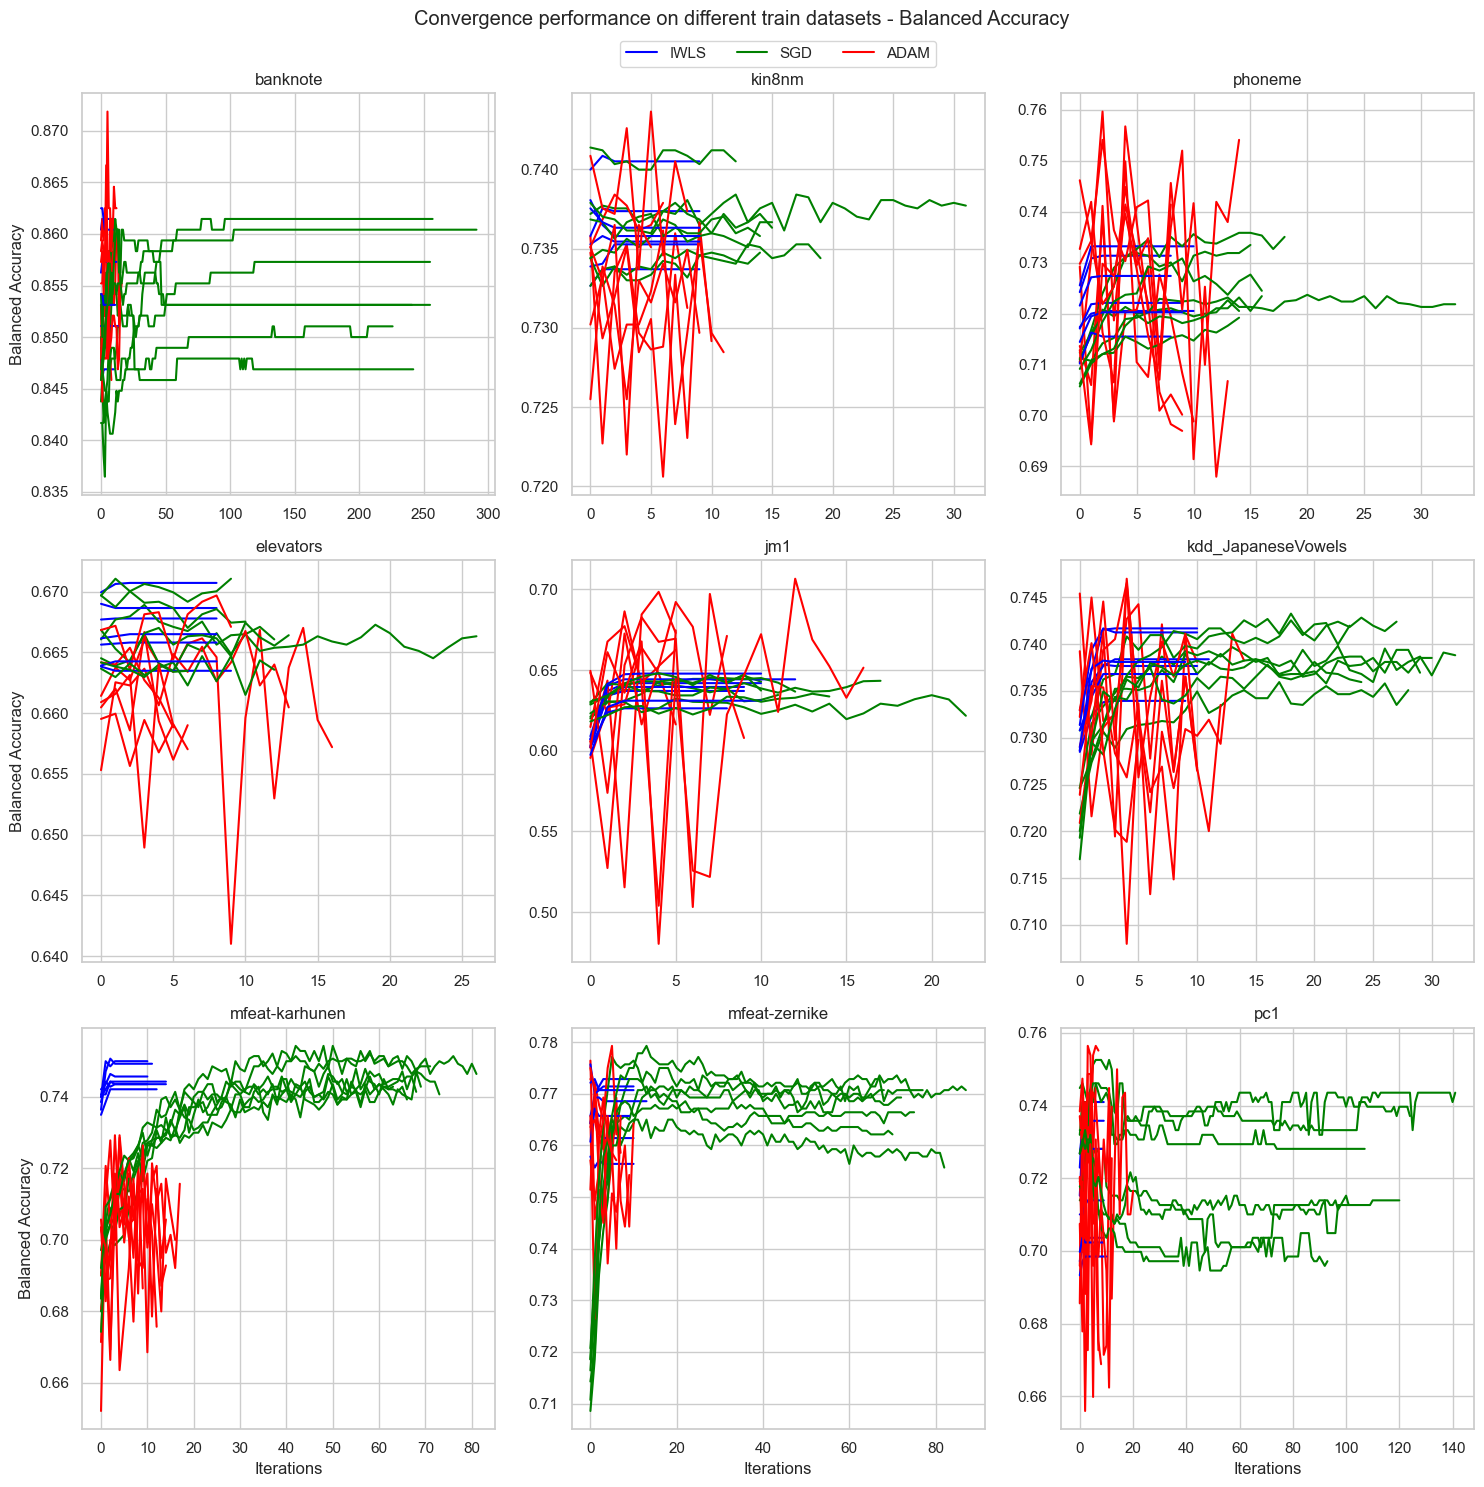

In [9]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Convergence performance on different train datasets - Balanced Accuracy', y=.99)
for i, dataset in enumerate(loader.get_supported_datasets()):
    res = cp[cp['dataset'] == dataset]
    for j, row in res.iterrows():
        axes[i//3, i%3].plot(row['loglik'], color=colors[row['method']])
    if i//3 == 0 and i%3 == 1:
        axes[i//3, i%3].legend(['IWLS', 'SGD', 'ADAM'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
    if i//3 == 2:
        axes[i//3, i%3].set_xlabel('Iterations')
    if i%3 == 0:
        axes[i//3, i%3].set_ylabel('Balanced Accuracy')
    axes[i//3, i%3].set_title(dataset)

plt.tight_layout()
plt.show()